## Background: 
Companies are always looking for ways to enhance their culture and environment. Achieving a high rate of general employee satisfaction can be quite the challenge. Further, how can a company determine factors that contribute to attrition, and how can they deter those factors? This is a question we are going to explore in this analysis.

## Data:
The dataset I chose for the Research Proposal is related to IBM Employee Attrition data. It is a fictional dataset created by data scientists at IBM. The dataset has 1470 obversations and 35 columns. The specific columns of interest in this research proposal are primarily Business Travel, Attrition, Job Role and Attrition Rate (created). The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Attrition Rate:** Attrition is defined as reduction in numbers usually as a result of resignation, retirement, or death. The attrition rate would be the percentage of attrition within a particular subset of the data.

In [36]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
attrition = pd.read_csv('IBM_Attrition.csv')

In [38]:
#Get a feel for how large the dataset is
attrition.shape

(1470, 35)

In [39]:
#Get a feel for the actual data, show all columns
pd.options.display.max_columns = 50
attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
#Continue to understand the variables in the dataset
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Analysis
The analysis below seeks to explore our dataset, using both univariate and bivariate methods, to find patterns or observations that form the basis of an experiment. After each plot, I have included a quick debrief and an indication as to whether or not it contributes to the final experiment design.

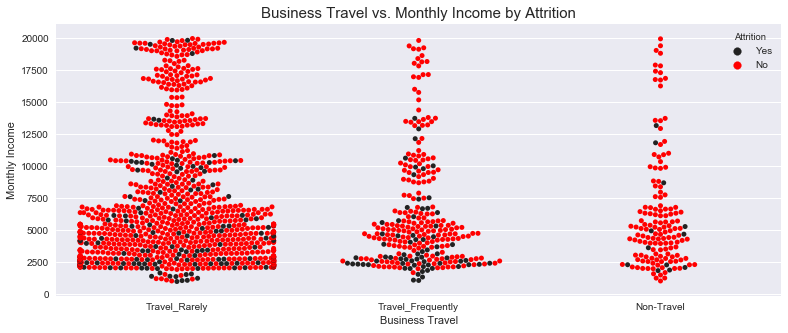

In [54]:
#Plot swarm plot showing business travel vs. monthly income by attrition

plt.figure(figsize=[13,5])
plt.title('Business Travel vs. Monthly Income by Attrition', fontsize=15)
axis = sns.swarmplot(x="BusinessTravel", y="MonthlyIncome", hue="Attrition", data=attrition, color='r')
axis.set(xlabel='Business Travel', ylabel='Monthly Income')

plt.show()

**Takeaway:** There seems to be a very strong custer of attrition within the "Travel_Frequently" category at the lower income level.

In [42]:
#Convert education from numeric to categorical

attrition['Education'].replace([1, 2, 3, 4, 5],
['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], inplace = True)

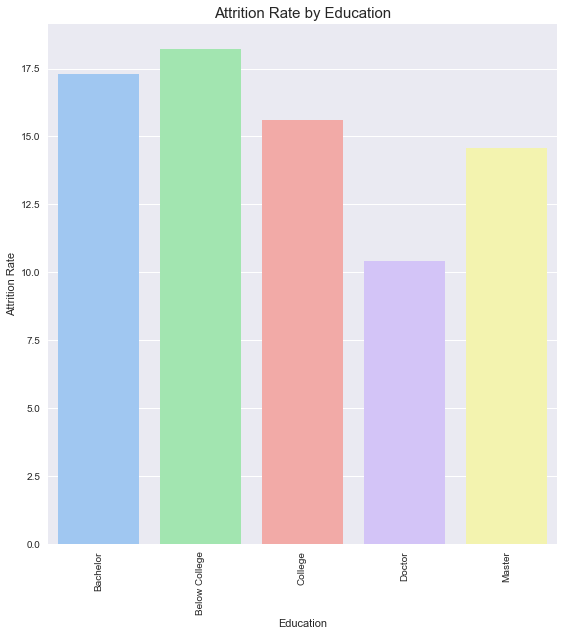

In [43]:
#Now, let's calculate attrition rate by education

attrition_education = attrition[['Education', 'Attrition']].groupby('Education').agg({'Attrition': 'value_counts'}).add_suffix('_count').reset_index()
attrition_education = pd.merge(attrition_education, attrition_education.groupby('Education').sum().reset_index(), on='Education')
attrition_education['Attrition Rate'] = attrition_education['Attrition_count_x']/attrition_education['Attrition_count_y']*100

# Now plot the attrition rate for education, first create a 
#dataframe with only Attrition = 'Yes'

attrition_education = attrition_education[attrition_education['Attrition'] == 'Yes']

#Plot
sns.set(style="darkgrid")
g = sns.factorplot(x="Education", y="Attrition Rate", data=attrition_education,
                   size=8, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Attrition Rate")
g.set_xlabels("Education")
plt.title('Attrition Rate by Education', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()

**Takeaway:** Attrition rate is highest amongst those employees who did not attend college. However, an interesting takeaway is that 'Bachelor' has a higher attrition rate than 'Below College'.

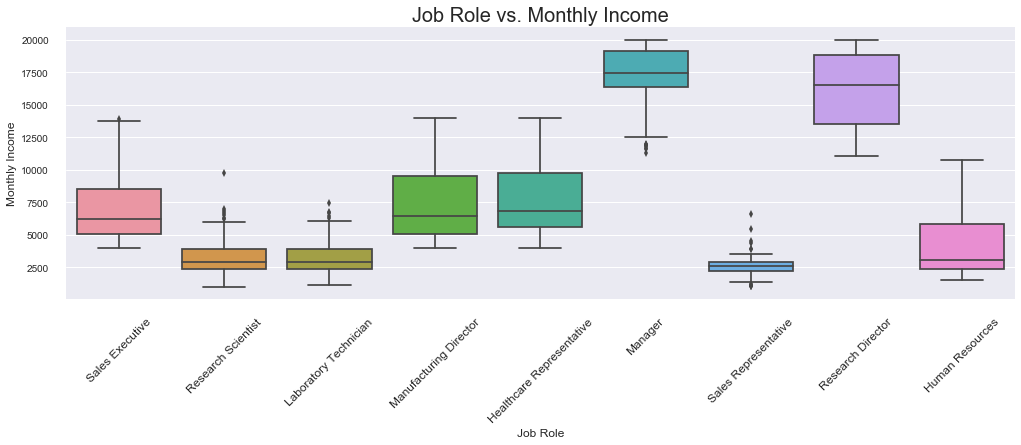

In [44]:
# Boxplot of monthly income by job role, want to specifically see how
#Sales representative fits in.

plt.figure(figsize=[17,5])
ax = sns.boxplot(x='JobRole',y='MonthlyIncome', data=attrition)  
plt.title('Job Role vs. Monthly Income', fontsize=20)
sns.despine(offset=10, trim=True)
ax.set(xlabel='Job Role', ylabel='Monthly Income')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xlabel('Job Role', fontsize=12)

plt.show()

**Takeaway:** The research scientist, laboratory technician, and sales representative roles stand out as being significantly different than the rest. Later, I will investigate job role by attrition; it will be interesting to see if these particular roles register higher attrition with monthly income as a factor.

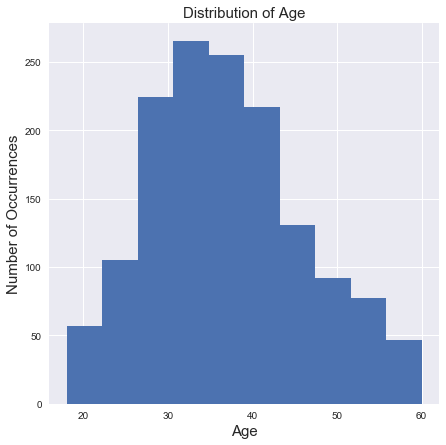

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
36.0


In [45]:
#Look at the distribution of age

plt.figure(figsize=[7,7])
plt.hist(attrition['Age'])
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=15)

plt.show()

#Describe the data statistically as well
print(attrition.Age.describe())
print(np.median(attrition['Age']))

**Takeaway:** Looking specifically at Age, we have a fairly normal distribution. If you look at the description beneath the plot, you can see our mean is 36.92 and the median is 36.

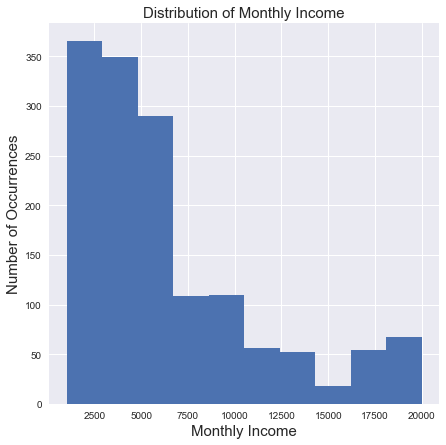

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64
4919.0


In [46]:
#Look at the distribution of monthly income

plt.figure(figsize=[7,7])
plt.hist(attrition['MonthlyIncome'])
plt.title('Distribution of Monthly Income', fontsize=15)
plt.xlabel('Monthly Income', fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=15)

plt.show()

#Describe the data statistically as well
print(attrition.MonthlyIncome.describe())
print(np.median(attrition['MonthlyIncome']))

**Takeaway:** Our distribution for monthly income is very strongly skewed right, as shown above. Essentially, this means that the frequency of employees making less than $7500/month is very high.

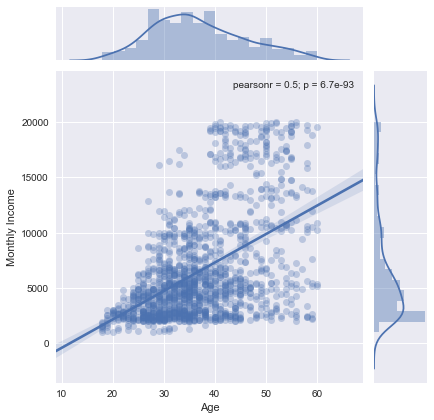

In [47]:
#Now look at age and income using a scatter plot with a line
#to understand the characteristics of our population

sns.jointplot(x="Age", y="MonthlyIncome", data=attrition, kind="reg",
               scatter_kws={'alpha':0.3}) # Set points to semi-transparent to see overlaping points.
plt.xlabel('Age')
plt.ylabel('Monthly Income')

plt.show()

**Takeaway:** Now that we looked at age and monthly income separately above, this plot serves as a gauge for correlation between the two. While there is some correlation, it is not strong and does not warrant further exploration.

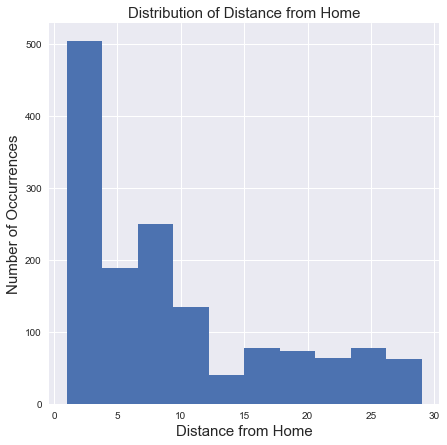

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
7.0


In [48]:
#Look at the distribution of Distance from Home

plt.figure(figsize=[7,7])
plt.hist(attrition['DistanceFromHome'])
plt.title('Distribution of Distance from Home', fontsize=15)
plt.xlabel('Distance from Home', fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=15)

plt.show()

#Describe the data statistically as well
print(attrition.DistanceFromHome.describe())
print(np.median(attrition['DistanceFromHome']))

**Takeaway:** Similar to the monthly income histogram above, this plot is very skewed to the right.  This tells us that the vast majority of employees do not live far from home. 

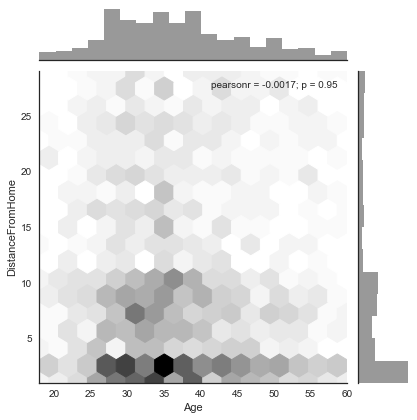

In [49]:
#Calculate distance from home vs. age

with sns.axes_style("white"):
    sns.jointplot(x='Age', y='DistanceFromHome', kind="hex", color="k", data=attrition)

**Takeaway:** We looked at age previously and just before this hexbin plot we explored distance from home in univariate fashion, now I wanted to see if there was correlation between the two. There is almost no correlation whatsoever, as you can tell from the r coefficient of -0.0017.

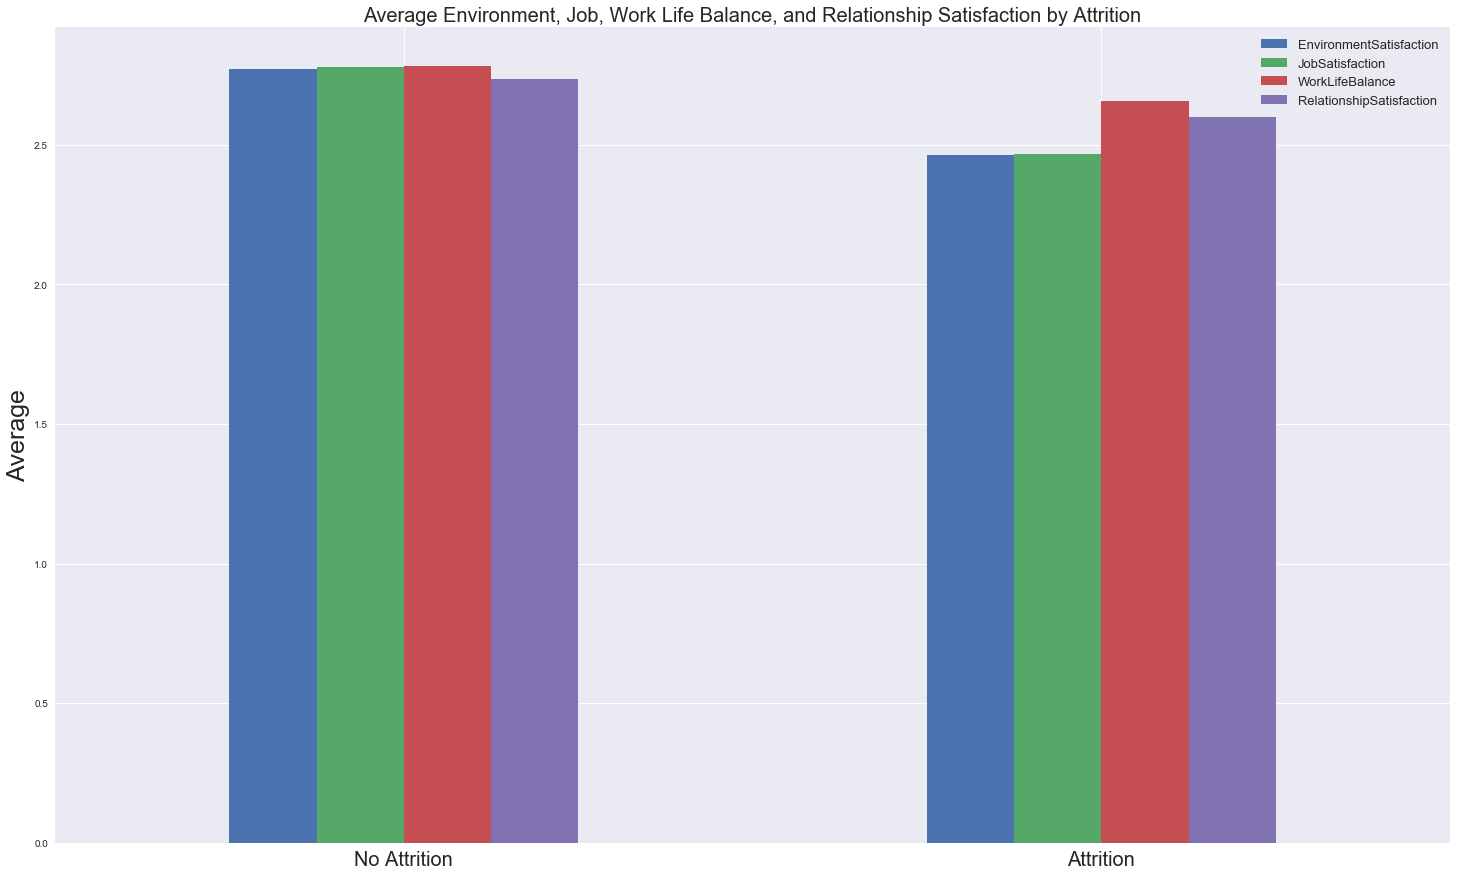

In [76]:
#Look at environment, job, work life balance, relationship satisfaction by attrition
attrition[['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction']].groupby('Attrition').mean().plot.bar(figsize=(25, 15))
plt.title('Average Environment, Job, Work Life Balance, and Relationship Satisfaction by Attrition', fontsize = 20)
plt.ylabel('Average', fontsize=25)
plt.xlabel('')
plt.xticks(np.arange(2), ('No Attrition', 'Attrition'), rotation='horizontal', fontsize=20)
plt.legend(loc='best', fontsize=13)

plt.show()

**Takeaway:** When looking at those who were attrited, overall satisfaction levels, from environment to relationship, were lower. These may serve as solid secondary metrics.

In [51]:
# Let's calculate attrition rate by job role

attrition_job_role = attrition[['JobRole', 'Attrition']].groupby('JobRole').agg({'Attrition': 'value_counts'}).add_suffix('_count').reset_index()
attrition_job_role = pd.merge(attrition_job_role, attrition_job_role.groupby('JobRole').sum().reset_index(), on='JobRole')
attrition_job_role['Attrition Rate'] = attrition_job_role['Attrition_count_x']/attrition_job_role['Attrition_count_y']*100

#Confirm this worked
attrition_job_role.head(5)

,JobRole,Attrition,Attrition_count_x,Attrition_count_y,Attrition Rate
0,Healthcare Representative,No,122,131,93.129771
1,Healthcare Representative,Yes,9,131,6.870229
2,Human Resources,No,40,52,76.923077
3,Human Resources,Yes,12,52,23.076923
4,Laboratory Technician,No,197,259,76.061776


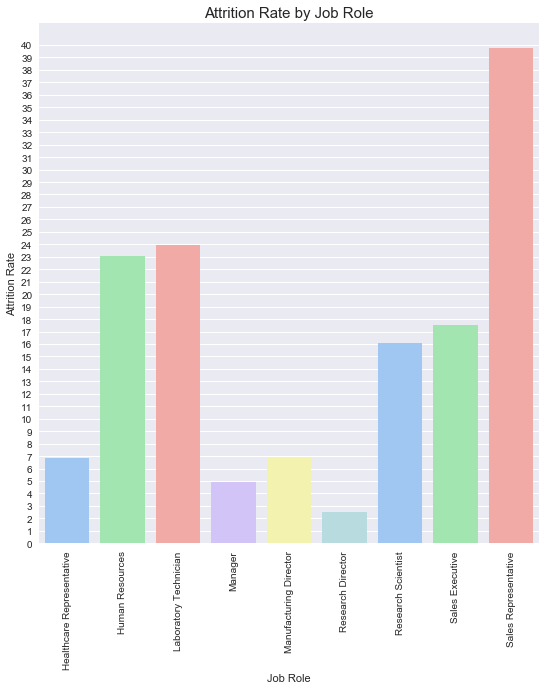

In [52]:
# Now plot the attrition rate for job role by business travel category, first create a 
#dataframe with only Attrition = 'Yes'

attrition_job_role = attrition_job_role[attrition_job_role['Attrition'] == 'Yes']

#Plot
sns.set(style="darkgrid")
g = sns.factorplot(x="JobRole", y="Attrition Rate", data=attrition_job_role,
                   size=8, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Attrition Rate")
g.set_xlabels("Job Role")
plt.title('Attrition Rate by Job Role', fontsize=15)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 41, 1))

plt.show()

**Takeaway:** The concept of attrition rate may end up forming the basis of the experiment, based on the plot above. Clearly, we see certain roles jump out as having the highest attrition rates. Maybe we can look at attrition rate in relation to other variables.

In [157]:
#Now, let's calculate attrition rate by business travel category

attrition_business_travel = attrition[['BusinessTravel', 'Attrition']].groupby('BusinessTravel').agg({'Attrition': 'value_counts'}).add_suffix('_count').reset_index()
attrition_business_travel = pd.merge(attrition_business_travel, attrition_business_travel.groupby('BusinessTravel').sum().reset_index(), on='BusinessTravel')
attrition_business_travel['Attrition Rate'] = attrition_business_travel['Attrition_count_x']/attrition_business_travel['Attrition_count_y']*100

#Confirm this worked
attrition_business_travel

,BusinessTravel,Attrition,Attrition_count_x,Attrition_count_y,Attrition Rate
0,Non-Travel,No,138,150,92.000000
1,Non-Travel,Yes,12,150,8.000000
2,Travel_Frequently,No,208,277,75.090253
3,Travel_Frequently,Yes,69,277,24.909747
4,Travel_Rarely,No,887,1043,85.043145
5,Travel_Rarely,Yes,156,1043,14.956855


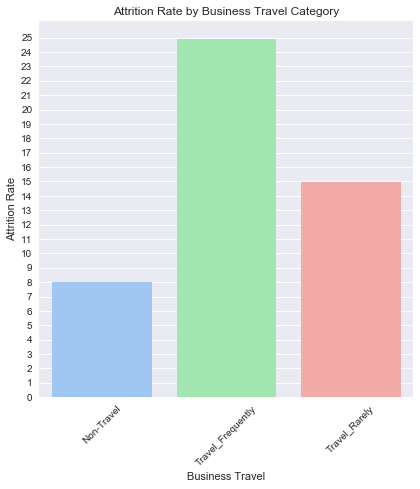

In [124]:
# Now plot the attrition rate by business travel category, first create a dataframe with only
# Attrition = 'Yes'

attrition_frequent_travel = attrition_business_travel[attrition_business_travel['Attrition'] == 'Yes']

#Plot
sns.set(style="darkgrid")
g = sns.factorplot(x="BusinessTravel", y="Attrition Rate", data=attrition_frequent_travel,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Attrition Rate")
g.set_xlabels("Business Travel")
plt.title('Attrition Rate by Business Travel Category')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 26, 1))

plt.show()

**Takeaway:** This may be the most telling plot thus far. Attrition rate is signficantly higher amongst those who travel, whether it be frequently or even rarely.

# Experimental Design

## Problem:
IBM wants to uncover contributing factors to attrition and how these might be deterred in the future. They have asked their data science team to conduct an experiment based on their analysis, in order to find potential solutions for reducing attrition.

## Solution:
Based on my findings from the exploratory analysis above, it seems that attrition rates are higher for those employees who travel. My experiment revolves around the implementation of teleconferencing mediums (non-travel based work) and how that impacts attrition over a given time period.

## Hypothesis:
Reduction in travel will lower the overall numbers of attrition.

## Sample Selection:
From the subset of employees who travel, two groups of 25 employees each will be randomly chosen. One being our treatment group and the other being our control group. The treatment group will be required to use a teleconferencing medium for all business, and will not travel. The control group will continue with no change to how they conduct business, including travel.

## Treatment
The treatment will be implementing a teleconfering medium to conduct normal business tasks, in lieu of traveling.

## Rollout & Evaluation Plan: 
The participating inidividuals are currently awaiting assignment and thus the rollout will be immediate. The intent is to collect data and conduct survey (see below in 'Data Collection' section) after 1 year.

**Data Collection**
1. Attrition Rate
2. Attrition Date
3. Number of Days Traveled
4. Employee Survey (for gathering information related to secondary metrics)

**Key Metric**
1. Attrition Rate

**Secondary Metrics**
1. Job Satisfaction
2. Environment Satisfaction
3. Relationship Satisfaction
4. Work Life Balance

**Success Criteria** - 
Our success metric will be **attrition rate**. Specifically, based on the results in our post-assignment survey, we want to observe a 50% reduction in attrition rate in our treatment group. If this criteria is satisfied, IBM should strongly consider moving to teleconferencing mediums in place of physical travel.